In [1]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.model_selection import train_test_split

# # Data inladen
df = pd.read_csv("encoded_df.csv")
print(df.head())
# df = groot_gemid_df

# Eerst de data opschudden om bias te voorkomen
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Zorg ervoor dat elke ervaring, geslacht en gewichtsklasse in elke set vertegenwoordigd zijn
train_data = pd.DataFrame()
val_data = pd.DataFrame()
test_data = pd.DataFrame()

for ervaring_0 in df['ervaring_0'].unique():
    for geslacht_M in df['geslacht_M'].unique():
        for gewichtsklasse_L in df['gewichtsklasse_L'].unique():
            subset = df[(df['ervaring_0'] == ervaring_0) & 
                        (df['geslacht_M'] == geslacht_M) & 
                        (df['gewichtsklasse_L'] == gewichtsklasse_L)]
            if not subset.empty:
                # 70% train, 15% validation, 15% test
                temp_train, temp_temp = train_test_split(subset, test_size=0.3, random_state=42)
                temp_val, temp_test = train_test_split(temp_temp, test_size=0.5, random_state=42)
                train_data = pd.concat([train_data, temp_train])
                val_data = pd.concat([val_data, temp_val])
                test_data = pd.concat([test_data, temp_test])


# Reset indexen
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Controleren op juiste verdeling
print(f"Trainingsdata: {len(train_data)} rijen")
print(f"Validatiedata: {len(val_data)} rijen")
print(f"Testdata: {len(test_data)} rijen")

# # Optioneel: data opslaan in aparte bestanden
# train_data.to_csv('train_data.csv', index=False)
# val_data.to_csv('val_data.csv', index=False)
# test_data.to_csv('test_data.csv', index=False)

print(df['2k tijd'].min())
print(df['2k tijd'].max())

   500_split  2k tijd  geslacht_M  geslacht_V  gewichtsklasse_L  \
0        104      379           1           0                 0   
1        104      379           1           0                 0   
2        104      379           1           0                 0   
3        104      379           1           0                 0   
4        104      379           1           0                 0   

   gewichtsklasse_Z  ervaring_0  ervaring_1  binary_trainingtype_0  \
0                 1           0           1                      1   
1                 1           0           1                      1   
2                 1           0           1                      1   
3                 1           0           1                      1   
4                 1           0           1                      1   

   binary_trainingtype_1  ...  binary_trainingtype_1101  \
0                      0  ...                         0   
1                      0  ...                         0   

In [10]:
X_train = train_data.drop(columns=['2k tijd'])
y_train = train_data['2k tijd']

X_val = val_data.drop(columns=['2k tijd'])
y_val = val_data['2k tijd']

X_test = test_data.drop(columns=['2k tijd'])
y_test = test_data['2k tijd']

# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)  # Fit on training data only
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

mse_train_rf = 42.60151949054952
mse_val_rf = 67.27183484567554
mse_test_rf = 58.006883297497275
rse_test_rf = 7.616225003077133
train_r2_rf = 0.9590350578388587
val_r2_rf = 0.9349425817603748
test_r2_rf = 0.9430262104934699
   Actual Values  Predicted Values (Random Forest)  Difference (Random Forest)
0            427                        418.147510                    8.852490
1            420                        425.453096                   -5.453096
2            418                        418.538947                   -0.538947
3            427                        427.718262                   -0.718262
4            427                        423.623624                    3.376376
5            420                        423.383458                   -3.383458
6            421                        422.498749                   -1.498749
7            449                        424.683469                   24.316531
8            431                        428.178511              

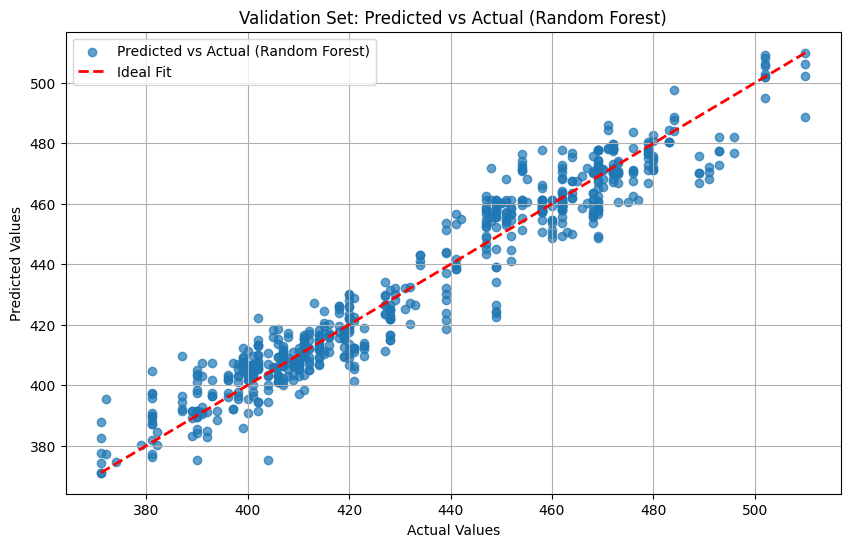

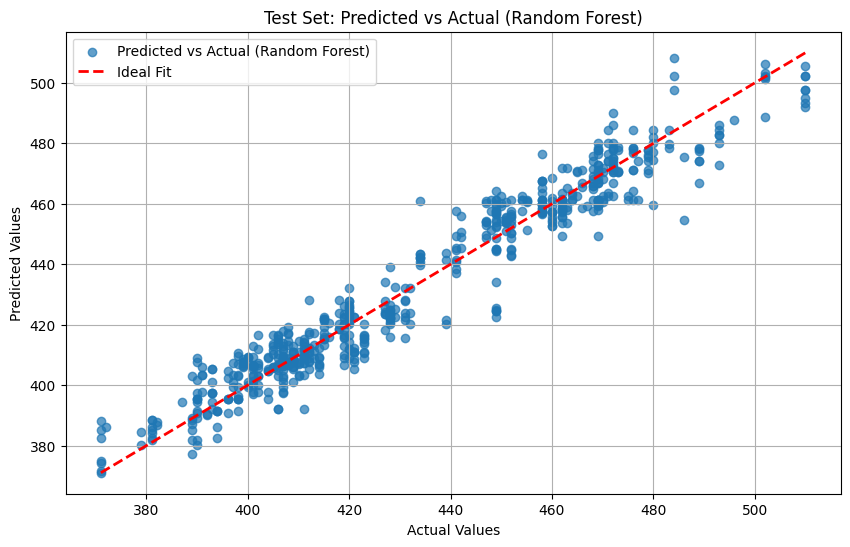

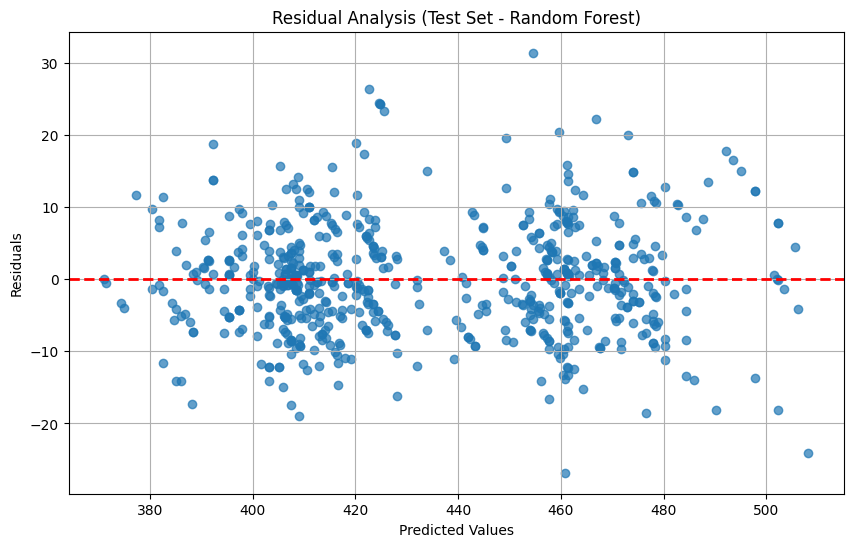

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(max_depth=15, random_state=0)
rf_model.fit(X_train_scaled, y_train)

train_pred_rf = rf_model.predict(X_train_scaled)
val_pred_rf = rf_model.predict(X_val_scaled)
test_pred_rf = rf_model.predict(X_test_scaled)

# example_input = np.array([[1, 104.6, 0, 0, 1]])
# example_prediction_rf = rf_model.predict(example_input)
# print(f"Example prediction (Random Forest): {example_prediction_rf}")

mse_train_rf = mean_squared_error(y_train, train_pred_rf)
mse_val_rf = mean_squared_error(y_val, val_pred_rf)
mse_test_rf = mean_squared_error(y_test, test_pred_rf)
rse_test_rf = np.sqrt(mse_test_rf)

print(f"mse_train_rf = {mse_train_rf}")
print(f"mse_val_rf = {mse_val_rf}")
print(f"mse_test_rf = {mse_test_rf}")
print(f"rse_test_rf = {rse_test_rf}")

train_r2_rf = r2_score(y_train, train_pred_rf)
val_r2_rf = r2_score(y_val, val_pred_rf)
test_r2_rf = r2_score(y_test, test_pred_rf)

print(f"train_r2_rf = {train_r2_rf}")
print(f"val_r2_rf = {val_r2_rf}")
print(f"test_r2_rf = {test_r2_rf}")

results_rf = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values (Random Forest)': test_pred_rf,
    'Difference (Random Forest)': y_test - test_pred_rf
})
print(results_rf.head(10))

# Plot 1: Actual vs Predicted for Validation Set (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_val, val_pred_rf, alpha=0.7, label='Predicted vs Actual (Random Forest)')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Validation Set: Predicted vs Actual (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Actual vs Predicted for Test Set (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred_rf, alpha=0.7, label='Predicted vs Actual (Random Forest)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Predicted vs Actual (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Residuals for Test Set (Random Forest)
residuals_rf = y_test - test_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(test_pred_rf, residuals_rf, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis (Test Set - Random Forest)')
plt.grid(True)
plt.show()


In [7]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

max_depths = range(1, 15)
validation_errors = []

for depth in max_depths:
    model = RandomForestRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    mse = mean_squared_error(y_val, predictions)
    validation_errors.append(mse)

best_depth = max_depths[validation_errors.index(min(validation_errors))]
print(f"Best max_depth: {best_depth}")


Best max_depth: 14
